# Undercomplete Autoencoder

ヘルプ：<a href="https://www.tensorflow.org/api_docs/python/tf/keras/Model" title="tf.keras.Model  |  TensorFlow Core v2.3.0" target="_blank">tf.keras.Model  |  TensorFlow Core v2.3.0</a>



In [1]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

encoding_dim = 32
input_img = tf.keras.layers.Input(shape=(784,))

encoded = tf.keras.layers.Dense(encoding_dim, activation='relu')(input_img)
decoded = tf.keras.layers.Dense(784, activation='sigmoid')(encoded)

autoencoder = tf.keras.models.Model(inputs=input_img, outputs=decoded)
autoencoder.compile(optimizer='Adam', loss='binary_crossentropy')

In [2]:
(x_train, _), (x_test, _) = tf.keras.datasets.mnist.load_data()

x_train = x_train.astype('float32') / 255.
x_test = x_test.astype('float32') / 255.

x_train = x_train.reshape((len(x_train), np.prod(x_train.shape[1:])))
x_test = x_test.reshape((len(x_test), np.prod(x_test.shape[1:])))

print(x_train.shape)
print(x_test.shape)

history = autoencoder.fit(x_train, x_train,
                epochs=50,
                batch_size=256,
                shuffle=True,
                validation_data=(x_test, x_test))

11493376/11490434 [==============================] - 0s 0us/step
(60000, 784)
(10000, 784)
Epoch 1/50
235/235 [==============================] - 1s 5ms/step - loss: 0.2785 - val_loss: 0.1879
Epoch 2/50
235/235 [==============================] - 1s 4ms/step - loss: 0.1696 - val_loss: 0.1526
Epoch 3/50
235/235 [==============================] - 1s 5ms/step - loss: 0.1437 - val_loss: 0.1333
Epoch 4/50
235/235 [==============================] - 1s 4ms/step - loss: 0.1285 - val_loss: 0.1217
Epoch 5/50
235/235 [==============================] - 1s 4ms/step - loss: 0.1187 - val_loss: 0.1135
Epoch 6/50
235/235 [==============================] - 1s 4ms/step - loss: 0.1117 - val_loss: 0.1075
Epoch 7/50
235/235 [==============================] - 1s 4ms/step - loss: 0.1064 - val_loss: 0.1029
Epoch 8/50
235/235 [==============================] - 1s 4ms/step - loss: 0.1025 - val_loss: 0.0996
Epoch 9/50
235/235 [==============================] - 1s 4ms/step - loss: 0.0996 - val_loss: 0.0971
Epoch 10/

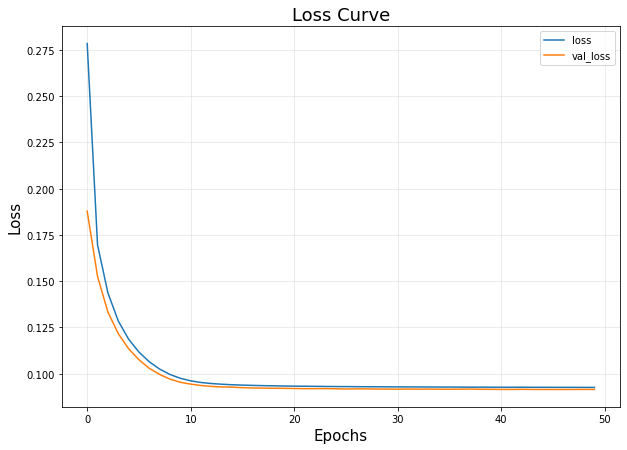

In [3]:
f = plt.figure(figsize=(10,7))
f.add_subplot()

plt.plot(history.epoch, history.history['loss'], label = "loss")
plt.plot(history.epoch, history.history['val_loss'], label = "val_loss")

plt.title("Loss Curve",fontsize=18)
plt.xlabel("Epochs",fontsize=15)
plt.ylabel("Loss",fontsize=15)
plt.grid(alpha=0.3)
plt.legend()
plt.savefig("Loss_curve.png")
plt.show()

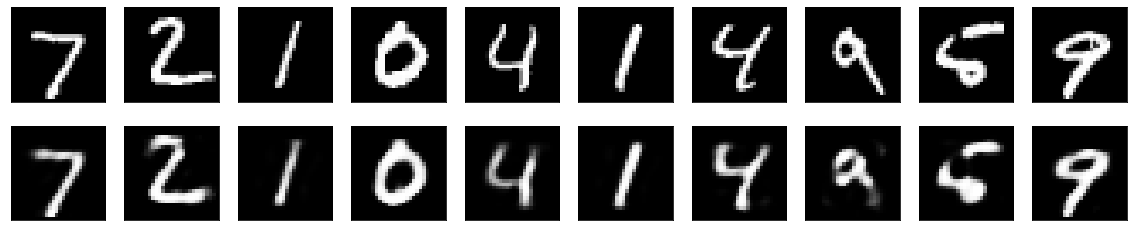

In [4]:
decoded_imgs = autoencoder.predict(x_test)

n = 10
plt.figure(figsize=(20, 4))
for i in range(n):
    ax = plt.subplot(2, n, i+1)
    plt.imshow(x_test[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    ax = plt.subplot(2, n, i+1+n)
    plt.imshow(decoded_imgs[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()

In [5]:
autoencoder.save_weights('autoencoder.h5')